In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
#imports pandas
import pandas as pd
from IPython.display import Image
import os
#import warnings and Repress Warnings
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="numpy.ndarray size changed")
warnings.filterwarnings('ignore')
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") #White Grid
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import warnings
warnings.filterwarnings('ignore')

1. Download dei dati

In [4]:
df = pd.read_csv("dataset/02-14-2018.csv")
df.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                 0          0.0         0.0   
1                0  ...                 0          0.0         0.0   
2                0  ...                 0          0.0         0.0   
3                0  ...                32          0.0         0.0   
4                0  ...                32          0.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min   Label  
0           0           0  56320859.5  139.300036  56320958  56320761  Benign  
1           0           0  56320733.0  114.551299  56320814  56320652  Benign  
2           0           0  56319311.5  301.934596  56319525  56319098  Benign  
3           0           0         0.0    0.000000         0         0  Benign  
4           0           0         0.0    0.000000         0         0  Benign  

[5 rows x 80 columns]

In [5]:
df.shape

(1048575, 80)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [7]:
pd.DataFrame(df.isnull().sum()/df.shape[0]).sort_values(ascending=0,by=[0])

0
Flow Byts/s     0.002172
Dst Port        0.000000
Bwd Byts/b Avg  0.000000
Fwd Pkts/b Avg  0.000000
Fwd Byts/b Avg  0.000000
...                  ...
Fwd IAT Min     0.000000
Fwd IAT Max     0.000000
Fwd IAT Std     0.000000
Fwd IAT Mean    0.000000
Label           0.000000

[80 rows x 1 columns]

Elimino righe con Flow Byts/s null

In [8]:
rows = df.loc[df['Flow Byts/s'].isnull()]
df.drop(labels=rows.index,axis=0,inplace=True)

In [9]:
df.shape

(1046298, 80)

In [10]:
df.describe()

Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  1.046298e+06  1.046298e+06   1.046298e+06  1.046298e+06  1.046298e+06   
mean   4.776915e+03  8.112144e+00   6.269168e+06  6.215780e+00  7.226879e+00   
std    1.430012e+04  4.464391e+00   1.261662e+09  4.452645e+01  1.049817e+02   
min    0.000000e+00  0.000000e+00  -9.190110e+11  1.000000e+00  0.000000e+00   
25%    2.200000e+01  6.000000e+00   7.000000e+00  1.000000e+00  1.000000e+00   
50%    5.300000e+01  6.000000e+00   1.033000e+03  2.000000e+00  1.000000e+00   
75%    4.430000e+02  6.000000e+00   4.079898e+05  7.000000e+00  6.000000e+00   
max    6.553300e+04  1.700000e+01   1.200000e+08  5.115000e+03  9.198000e+03   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     1.046298e+06     1.046298e+06     1.046298e+06     1.046298e+06   
mean      4.489686e+02     4.531644e+03     1.749535e+02     8.407793e+00   
std       1.575251e+04     1.516667e+05     2.878687e+02     1.950004e+01   
min       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
50%       3.600000e+01     5.500000e+01     3.400000e+01     0.000000e+00   
75%       4.550000e+02     7.880000e+02     2.000000e+02     0.000000e+00   
max       8.591554e+06     1.339773e+07     6.444000e+04     1.460000e+03   

       Fwd Pkt Len Mean  ...  Fwd Act Data Pkts  Fwd Seg Size Min  \
count      1.046298e+06  ...       1.046298e+06      1.046298e+06   
mean       3.888022e+01  ...       2.799615e+00      2.328673e+01   
std        5.334605e+01  ...       5.561620e+00      1.107275e+01   
min        0.000000e+00  ...       0.000000e+00      0.000000e+00   
25%        0.000000e+00  ...       0.000000e+00      2.000000e+01   
50%        2.566667e+01  ...       0.000000e+00      2.000000e+01   
75%        5.600000e+01  ...       4.000000e+00      3.200000e+01   
max        1.121703e+04  ...       1.031000e+03      4.800000e+01   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  1.046298e+06  1.046298e+06  1.046298e+06  1.046298e+06  1.046298e+06   
mean   5.163662e+04  2.140800e+04  8.808285e+04  4.004173e+04  3.107955e+06   
std    5.821861e+05  2.188760e+05  7.403654e+05  5.608755e+05  5.420668e+08   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.102401e+08  5.723446e+07  1.102401e+08  1.102401e+08  3.394503e+11   

           Idle Std      Idle Max      Idle Min  
count  1.046298e+06  1.046298e+06  1.046298e+06  
mean   7.313098e+05  4.822864e+06  2.131548e+06  
std    3.824185e+08  1.523772e+09  1.818962e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  
max    2.432682e+11  9.797810e+11  1.260300e+10  

[8 rows x 78 columns]

In [11]:
df_maligne = df[df['Label']!='Benign']
df_maligne.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
94        21         6  14/02/2018 10:33:26             19             1   
95        21         6  14/02/2018 10:33:26              3             1   
96        21         6  14/02/2018 10:33:26              3             1   
97        21         6  14/02/2018 10:33:26              2             1   
98        21         6  14/02/2018 10:33:26              2             1   

    Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
94             1                0                0                0   
95             1                0                0                0   
96             1                0                0                0   
97             1                0                0                0   
98             1                0                0                0   

    Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
94                0  ...                40          0.0         0.0   
95                0  ...                40          0.0         0.0   
96                0  ...                40          0.0         0.0   
97                0  ...                40          0.0         0.0   
98                0  ...                40          0.0         0.0   

    Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
94           0           0        0.0       0.0         0         0   
95           0           0        0.0       0.0         0         0   
96           0           0        0.0       0.0         0         0   
97           0           0        0.0       0.0         0         0   
98           0           0        0.0       0.0         0         0   

             Label  
94  FTP-BruteForce  
95  FTP-BruteForce  
96  FTP-BruteForce  
97  FTP-BruteForce  
98  FTP-BruteForce  

[5 rows x 80 columns]

In [12]:
df_port_most_used = df[df['Dst Port']>=(21)][df['Dst Port']<=(22)]
df_port_most_used['Label'].value_counts()/df_port_most_used.shape[0]

FTP-BruteForce    0.507088
SSH-Bruteforce    0.491968
Benign            0.000944
Name: Label, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '53'),
  Text(4, 0, '80'),
  Text(5, 0, '137'),
  Text(6, 0, '443'),
  Text(7, 0, '445'),
  Text(8, 0, '3389'),
  Text(9, 0, '5355')])

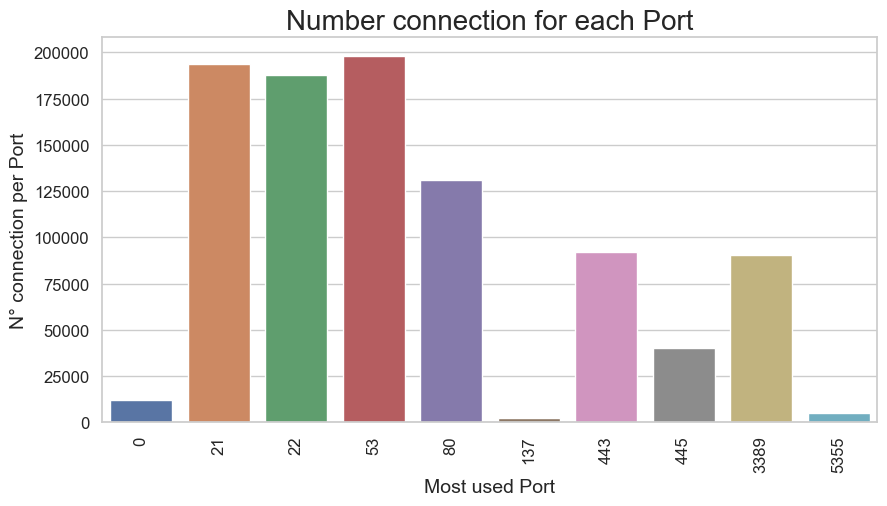

In [13]:
#df[df['Dst Port']<100].hist(column="Dst Port",bins=100)


plt.figure(figsize=(10,5))
sns.barplot(x=df['Dst Port'].value_counts()[:10].index, y=df['Dst Port'].value_counts()[:10],palette='deep')
plt.ylabel("N° connection per Port")
plt.xlabel("Most used Port")
plt.title("Number connection for each Port",size = 20)
plt.xticks(rotation=90)

In [39]:
df_new = df.sample(10000)


df_new.replace(to_replace="Benign", value=0, inplace=True)
df_new.replace(to_replace="FTP-BruteForce", value=1, inplace=True)
df_new.replace(to_replace="SSH-Bruteforce", value=1, inplace=True)



#df_new.corrwith(df_new['Label']).sort_values(ascending=False)
#corr_matrix["Label"].sort_values(ascending=False)


fig,ax = plt.subplots(figsize=(100,100))
fig = sns.heatmap(df_new.corr(), annot=True,linewidths=.5,fmt='.3f')
plt.title("Dataset correlations", size=20)
plt.show()